In [183]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import aux_functions as aux

In [184]:
train_data, train_labels, test_data, test_labels = aux.generateLetterData(10000, 1200)

print("Letter Data Dimensions")
print("train_data")
print(train_data.shape)
print("train_labels")
print(train_labels.shape)
print("test")
print(test_data.shape)
print("test_labels")
print(test_labels.shape)

def compute_logits(x):
    """Compute the logits of the model"""    
    hidden_nodes = 2
    
    W1 = tf.get_variable('W1', shape=[8 * 8, hidden_nodes])
    #b1 = tf.get_variable('b1', shape=[2])
    h1 = tf.matmul(x , W1, name='h1')
    
    W2 = tf.get_variable('W2', shape=[hidden_nodes, 3])
    b2 = tf.get_variable('b2', shape=[3]) 
    logits = tf.nn.softmax(tf.add(tf.matmul(h1 , W2), b2, name='logits'))
    
    #logits = tf.nn.relu(tf.matmul(x, W), name='logits')
    return logits, W1

# Note: this function is implemented in tensorflow as
# tf.nn.softmax_cross_entropy_with_logits

# We have included it here for illustration only, please don't use it.
def compute_cross_entropy(logits, y):
    y_pred = tf.nn.softmax(logits, name='y_pred') # the predicted probability for each example.

    # Compute the average cross-entropy across all the examples.
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), axis=[1]))
    return cross_entropy

def compute_accuracy(logits, y):
    prediction = tf.argmax(logits, 1, name='pred_class')
    true_label = tf.argmax(y, 1, name='true_class')
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, true_label), tf.float32))
    return accuracy

Letter Data Dimensions
train_data
(6000, 64)
train_labels
(6000,)
test
(1200, 64)
test_labels
(1200,)


In [185]:
with tf.Graph().as_default():
    # We build the model here as before
    x = tf.placeholder(tf.float32, [None, 64], name='x')
    y = tf.placeholder(tf.float32, [None, 3], name='y')
    
    logits, W1 = compute_logits(x)
    loss = compute_cross_entropy(logits=logits, y=y)
    accuracy = compute_accuracy(logits, y)
    onehot_labels = tf.one_hot(indices = tf.cast(train_labels, tf.int32), depth=3)
    
    opt = tf.train.AdamOptimizer(0.01)
    train_step = opt.minimize(loss)
    
    # Let's put the summaries below
    
    # create summary for loss and accuracy
    tf.summary.scalar('loss', loss) 
    tf.summary.scalar('accuracy', accuracy)
    
    # create summary for logits
    tf.summary.histogram('logits', logits)
    
    # create summary for input image
    tf.summary.image('input', tf.reshape(x, [-1, 8, 8, 1]))
    
    summary_op = tf.summary.merge_all()
    
    with tf.Session() as sess:
        summary_writer = tf.summary.FileWriter('logs/example1', sess.graph)
        
        sess.run(tf.global_variables_initializer())
    
        for i in range(101):
            lab = sess.run(onehot_labels)
            _, ac, summary = sess.run((train_step, accuracy, summary_op),
                                      feed_dict={x: train_data, y: lab})
            
            
            # write the summary output to file
            summary_writer.add_summary(summary, i)

            if i % 10 == 0:
                print('Step {0}: accuracy is {1}'.format(i + 1, ac))
        
        weight1 = tf.reshape(W1[:,0], [8, 8])
        weight1 = weight1.eval()
        
        weight2 = tf.reshape(W1[:,1], [8, 8])
        weight2 = weight2.eval()

Step 1: accuracy is 0.20283333957195282
Step 11: accuracy is 0.3333333432674408
Step 21: accuracy is 0.3684999942779541
Step 31: accuracy is 0.5023333430290222
Step 41: accuracy is 0.637333333492279
Step 51: accuracy is 0.6610000133514404
Step 61: accuracy is 0.6654999852180481
Step 71: accuracy is 0.6661666631698608
Step 81: accuracy is 0.6666666865348816
Step 91: accuracy is 0.6666666865348816
Step 101: accuracy is 0.6666666865348816
Step 111: accuracy is 0.6666666865348816
Step 121: accuracy is 0.6666666865348816
Step 131: accuracy is 0.6666666865348816
Step 141: accuracy is 0.6666666865348816


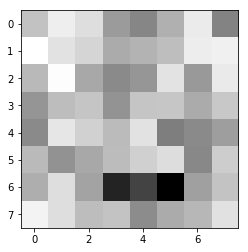

In [186]:
plt.imshow(np.array(weight1), cmap='gray')
plt.show()

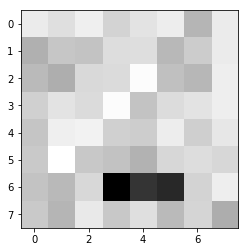

In [187]:
plt.imshow(np.array(weight2), cmap='gray')
plt.show()